In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
import fileinput
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## PART 1 - DATA PRE-PROCESSING

- Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
- If applicable, use dimensionality reduction and discuss how it impacts the clusters.
- Explain your data preparation process.

The data for this study was obtained from the Kaggle challenge named "Credit Card Dataset for Clustering". The dataset summarizes the usage behavior of approximately 9000 active credit cardholders during the last six months and is at the customer level with 18 behavioral variables. The data dictionary for the Credit Card dataset includes variables is:

- CUSTID: This is the identification number assigned to each Credit Cardholder. It is a categorical variable.

- BALANCE: This refers to the remaining balance in the cardholder's account that can be used for making purchases.

- BALANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently the balance is updated. A score of 1 means the balance is frequently updated while a score of 0 indicates infrequent updates.

- PURCHASES: This is the total amount of purchases made from the account.

- ONEOFFPURCHASES: Maximum amount of purchase made in a single transaction.

- INSTALLMENTSPURCHASES: This indicates the number of purchases made in installments.

- CASH ADVANCE: This is the amount of cash in advance given by the user.

- PURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases are made from the account. A score of 1 means frequent purchases while a score of 0 indicates infrequent purchases.

- ONEOFFPURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently one-off purchases are made. A score of 1 means frequent one-off purchases while a score of 0 indicates infrequent one-off purchases.

- PURCHASES INSTALLMENTS FREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases in installments are made. A score of 1 means frequent installment purchases while a score of 0 indicates infrequent installment purchases.

- CASHADVANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently cash in advance is being paid back.

- CASHADVANCETRX: This refers to the number of transactions made with "Cash in Advance".

- PURCHASESTRX: This is the number of purchase transactions made.

- CREDIT LIMIT: This is the credit limit assigned to the user's Credit Card.

- PAYMENTS: This is the total amount of payment made by the user.

- MINIMUM_PAYMENTS: This is the minimum amount of payment made by the user.

- PRCFULLPAYMENT: This indicates the percentage of full payment made by the user.

- TENURE: This is the tenure of the credit card service for the user.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Customer_Data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [69]:
# Adjust pandas display settings to show all columns
pd.set_option('display.max_columns', None)

# Filter the DataFrame 'df' to find rows where ONEOFF_PURCHASES is greater than CREDIT_LIMIT
oneoff_above_limit = df[df['ONEOFF_PURCHASES'] > df['CREDIT_LIMIT']]

# Get the count of such cases
count_above_limit = oneoff_above_limit.shape[0]

print(f"Number of cases where ONEOFF_PURCHASES are higher than CREDIT_LIMIT: {count_above_limit}")

# Display a few examples, ensuring that CREDIT_LIMIT is visible
print(oneoff_above_limit[['CUST_ID', 'ONEOFF_PURCHASES', 'CREDIT_LIMIT']].head())

# Reset display settings if needed
pd.reset_option('display.max_columns')

Number of cases where ONEOFF_PURCHASES are higher than CREDIT_LIMIT: 198
    CUST_ID  ONEOFF_PURCHASES  CREDIT_LIMIT
125  C10131          12462.44        2800.0
204  C10212           8208.00        7500.0
224  C10233           9325.22        8500.0
262  C10273           4944.88        3000.0
273  C10284          26547.43       11500.0


In [73]:
# Filter the DataFrame to find the row with CUST_ID "C10131"
customer_c10131 = df[df['CUST_ID'] == 'C10131']
customer_c10131.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
125  C10131  2392.917738                1.0   12462.44          12462.44   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
125                     0.0           0.0             0.916667   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
125                    0.916667                               0.0  ...   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  \
125  11628.71557       2000.990921               0.0      12        1   

         PCA1      PCA2  DBSCAN_Cluster  Agglomerative_Cluster  \
125  9.145747 -1.344602              -1                      1   

     DBSCAN_Cluster_Reduced  
125                      -1  

[1 rows x 24 columns]

Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Exclude non-numeric columns before filling missing values
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Proceed with scaling and clustering
features = df[numeric_features]  
# Only keep numeric columns for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

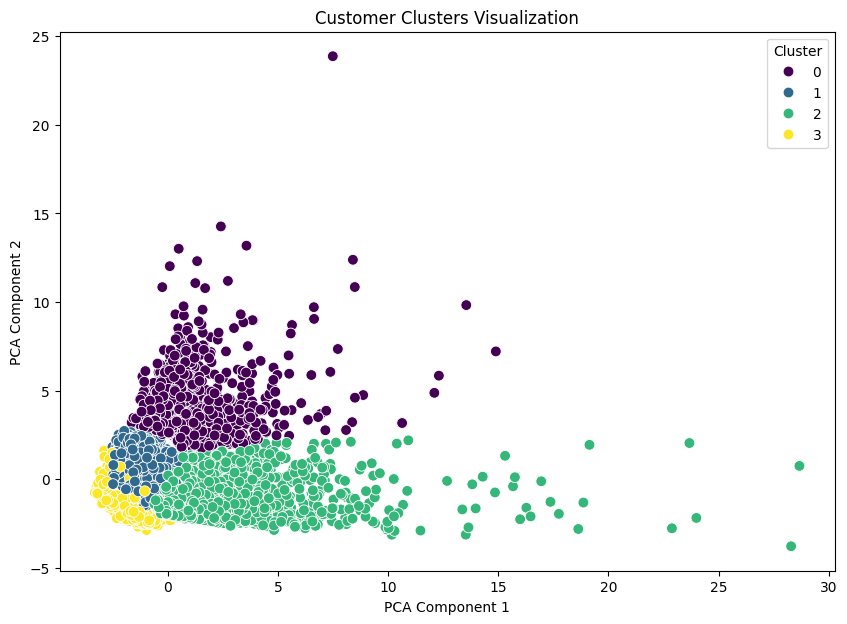

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocessing
# Drop the non-numeric column 'CUST_ID'
df_cleaned = df.drop(['CUST_ID'], axis=1)

# Handle missing values by imputing with mean
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Step 2: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Step 3: Clustering using K-Means
# Determine the optimal number of clusters using the elbow method (optional)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 4: Visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=60)
plt.title('Customer Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

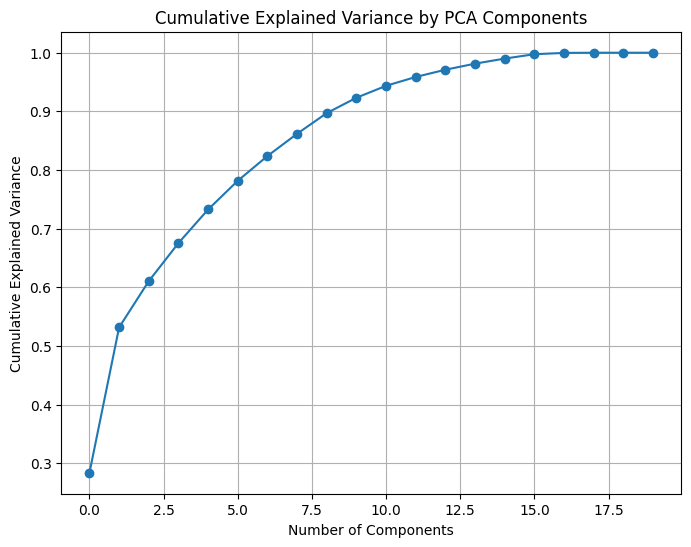

In [10]:
df_cleaned = df.drop(['CUST_ID'], axis=1)

# Ensure all columns are numeric
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Handle missing values by imputing with mean
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Apply PCA
pca = PCA().fit(scaled_data)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [11]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold (e.g., 0.1) to remove low-variance features
selector = VarianceThreshold(threshold=0.1)
selector.fit(scaled_data)
low_variance_features = df_cleaned.columns[~selector.get_support()]
print(f'Features to remove due to low variance: {low_variance_features}')

Features to remove due to low variance: Index([], dtype='object')


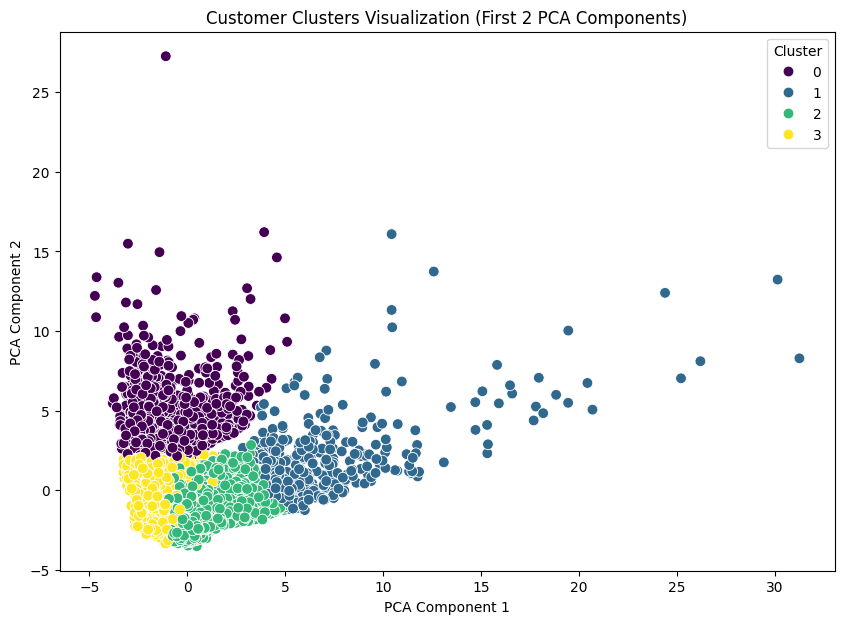

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocessing (assuming df_cleaned is prepared as before)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Step 2: Apply PCA to reduce dimensions
pca = PCA(n_components=10)  # Adjust to the number of components explaining ~90% variance
pca_data = pca.fit_transform(scaled_data)

# Step 3: Clustering using K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 4: Visualization using the first 2 PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('Customer Clusters Visualization (First 2 PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

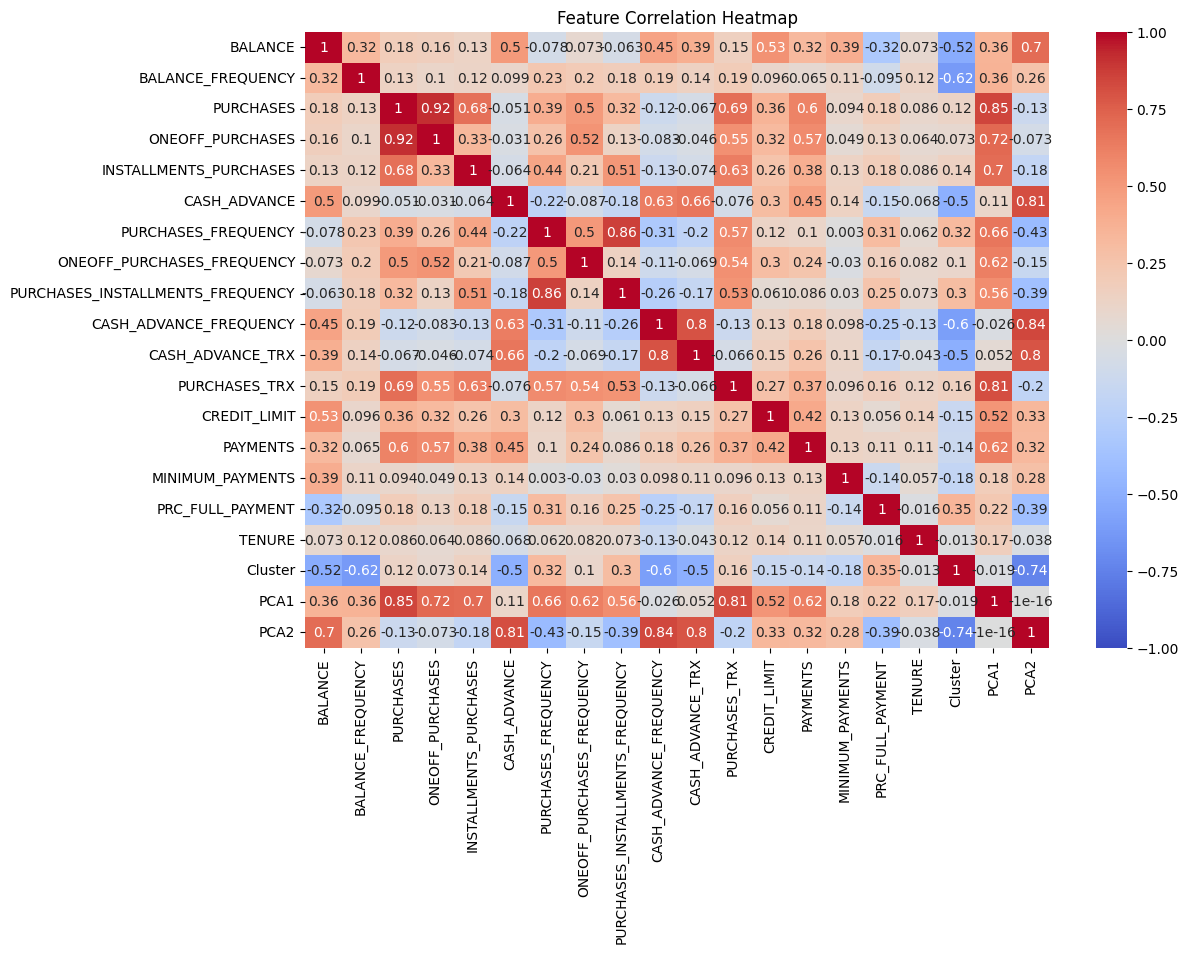

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
import numpy as np

# Set a correlation threshold
corr_threshold = 0.85

# Find highly correlated features
corr_matrix = df_cleaned.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > corr_threshold)]

print(f'Features to consider removing due to high correlation: {high_corr_features}')

Features to consider removing due to high correlation: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PCA1']


In [16]:
df['TENURE'].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

In [17]:
df['PRC_FULL_PAYMENT'].value_counts()

PRC_FULL_PAYMENT
0.000000    5903
1.000000     488
0.083333     426
0.166667     166
0.500000     156
0.250000     156
0.090909     153
0.333333     134
0.100000      94
0.200000      83
0.666667      78
0.916667      77
0.181818      75
0.750000      68
0.833333      63
0.111111      61
0.142857      54
0.125000      52
0.416667      44
0.400000      42
0.300000      40
0.454545      36
0.272727      35
0.800000      33
0.363636      32
0.583333      31
0.600000      28
0.545455      27
0.636364      26
0.285714      24
0.727273      22
0.222222      20
0.909091      19
0.714286      19
0.777778      19
0.875000      18
0.444444      17
0.818182      17
0.900000      16
0.428571      14
0.571429      14
0.375000      13
0.857143      12
0.700000      12
0.888889      12
0.555556      12
0.625000       9
Name: count, dtype: int64

## PART 2 - EXPLORATORY DATA ANALYSIS (EDA)

- Perform an EDA to understand the data and identify patterns that could inform the clustering.
- Explain your findings

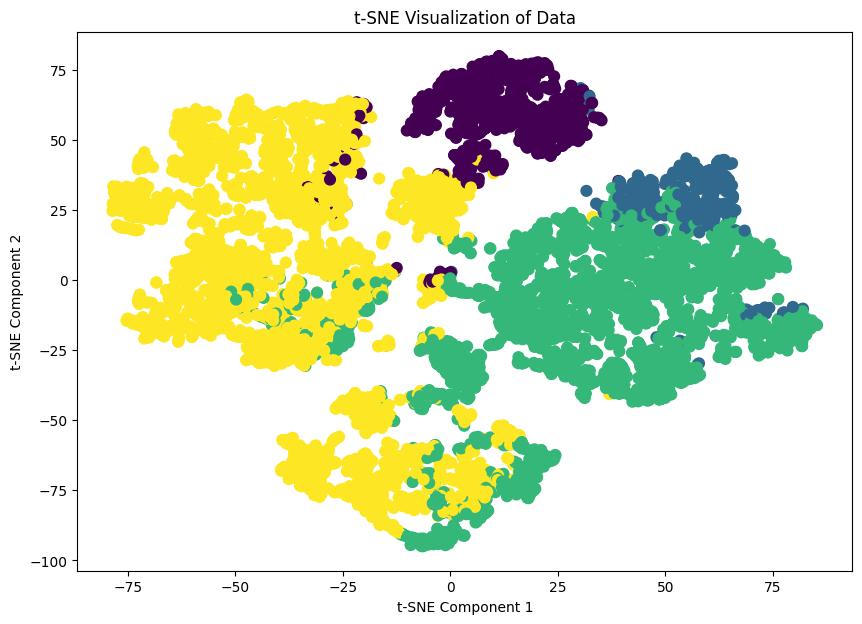

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap='viridis', s=60)
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.2163212465593582


In [47]:
# Basic information
print("Dataset Overview:")
print(df_cleaned.info())
print("\nSample Data:")
print(df_cleaned.head())

# Check for missing values
print("\nMissing Values:")
print(df_cleaned.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 7357 entries, 0 to 8880
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7357 non-null   float64
 1   BALANCE_FREQUENCY                 7357 non-null   float64
 2   PURCHASES                         7357 non-null   float64
 3   ONEOFF_PURCHASES                  7357 non-null   float64
 4   INSTALLMENTS_PURCHASES            7357 non-null   float64
 5   CASH_ADVANCE                      7357 non-null   float64
 6   PURCHASES_FREQUENCY               7357 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7357 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  7357 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            7357 non-null   float64
 10  CASH_ADVANCE_TRX                  7357 non-null   int64  
 11  PURCHASES_TRX                     7357 non-null   int64 

In [48]:
# Summary statistics for numerical features
print("Summary Statistics:")
print(df_cleaned.describe())

Summary Statistics:
           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  7357.000000        7357.000000  7357.000000       7357.000000   
mean   1265.961217           0.889557   726.544117        401.327996   
std    1513.889707           0.213959   990.780933        732.840201   
min       0.001214           0.181818     0.000000          0.000000   
25%     117.439961           0.909091    45.650000          0.000000   
50%     791.778273           1.000000   354.630000         29.900000   
75%    1747.119490           1.000000  1000.000000        495.700000   
max    7803.071972           1.000000  7323.380000       5439.960000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             7357.000000   7357.000000          7357.000000   
mean               325.483578    671.604546             0.484540   
std                507.574218   1230.940195             0.396899   
min                  0.000000      0.000000             0.0

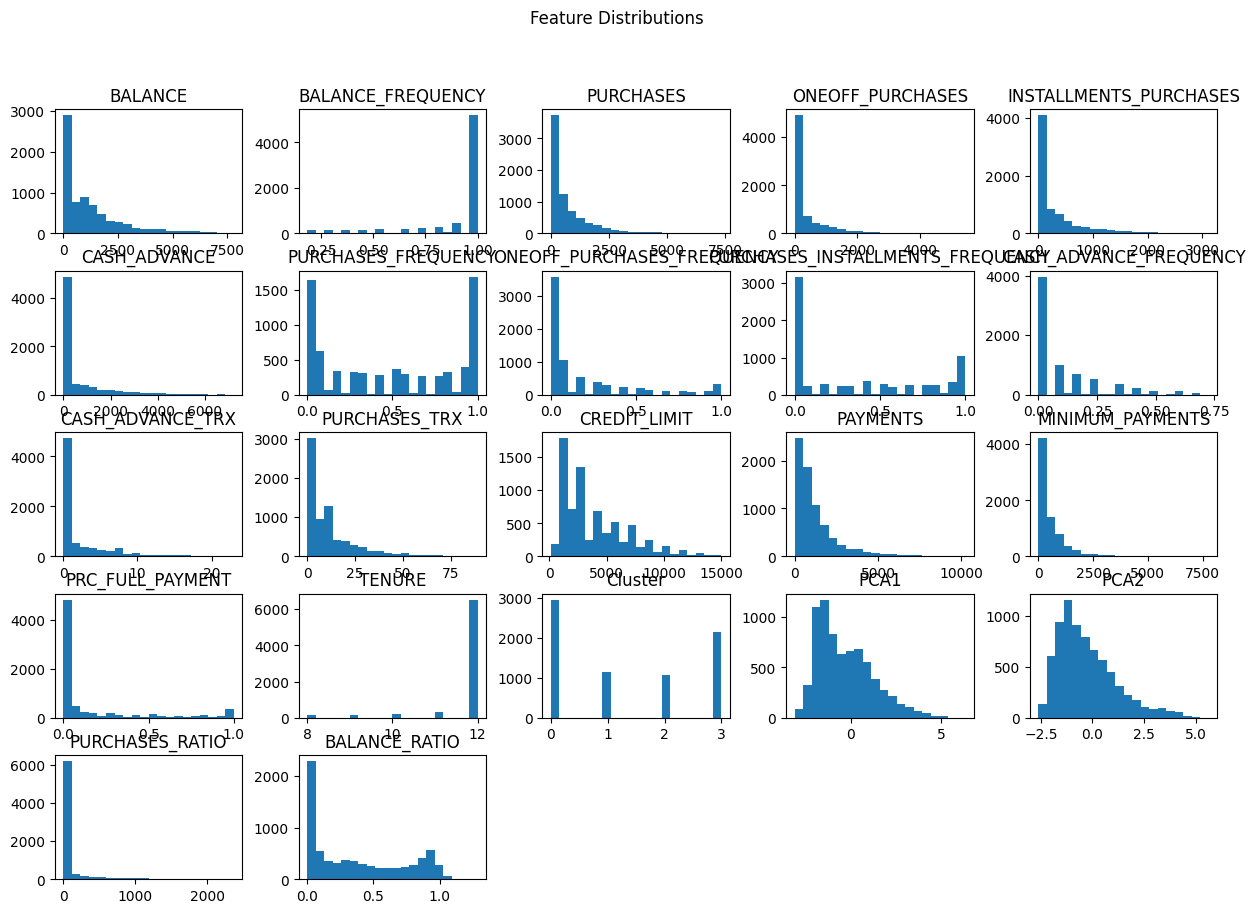

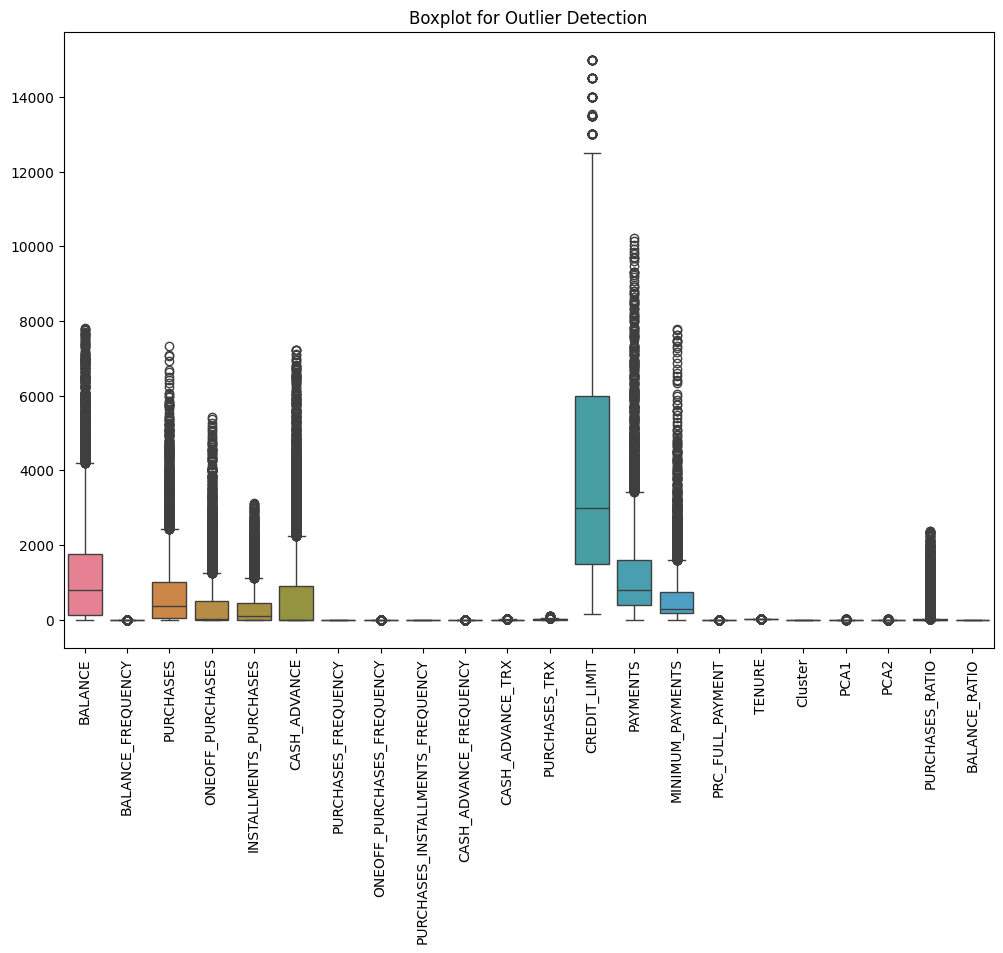

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df_cleaned.hist(bins=20, figsize=(15, 10), grid=False)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

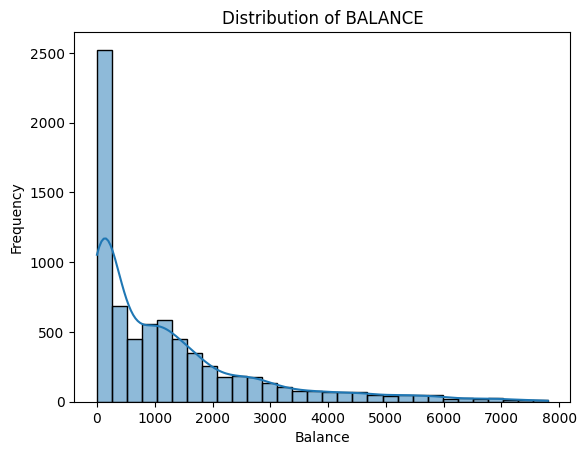

In [51]:
# Example of univariate analysis: distribution of BALANCE
sns.histplot(df_cleaned['BALANCE'], bins=30, kde=True)
plt.title("Distribution of BALANCE")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

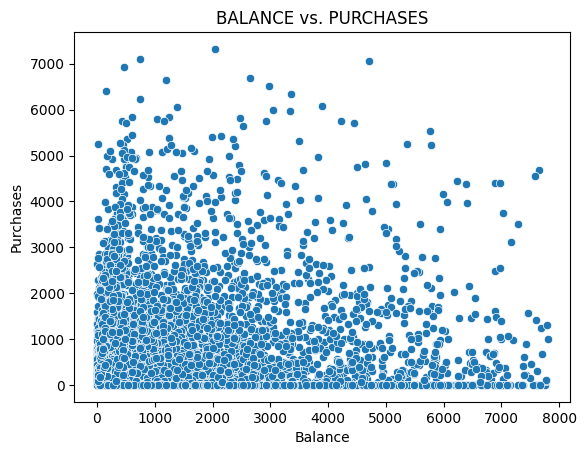

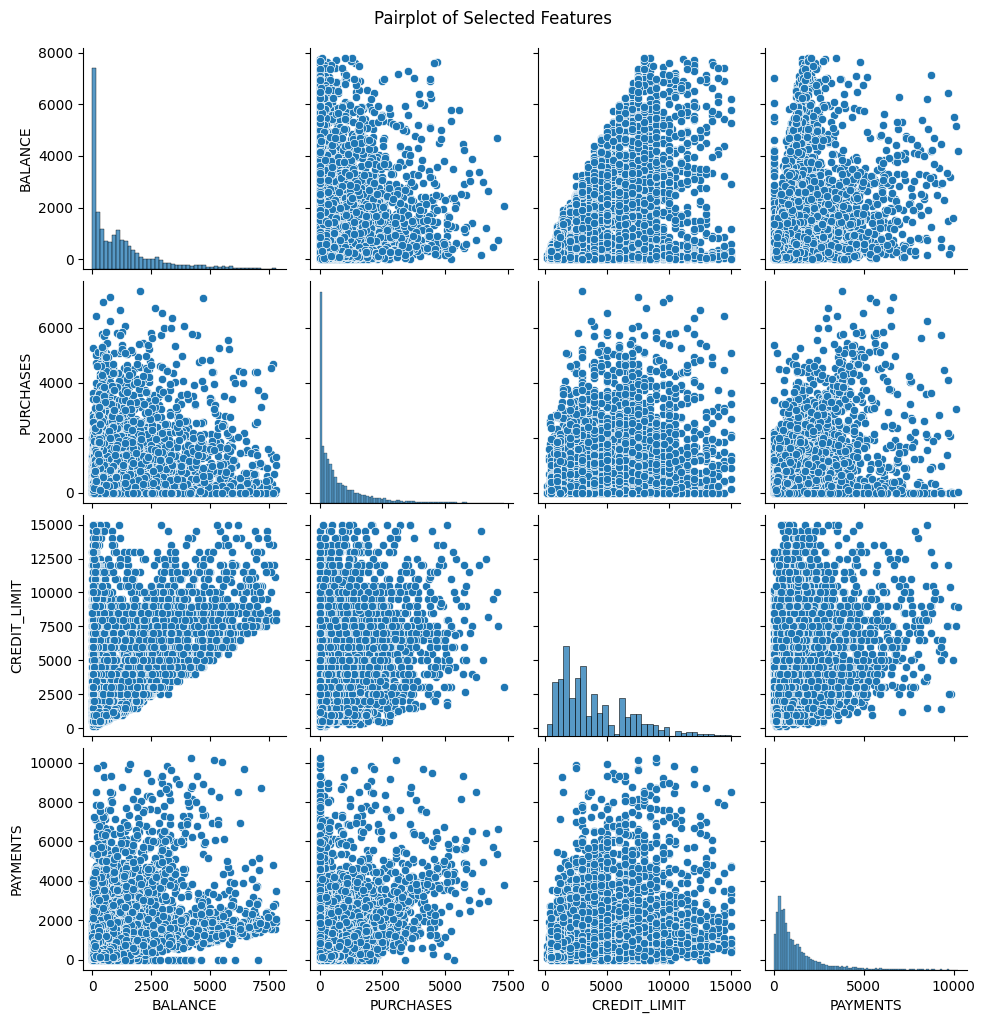

In [52]:
# Scatter plot example: BALANCE vs. PURCHASES
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df_cleaned)
plt.title("BALANCE vs. PURCHASES")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.show()

# Pairplot for selected features
selected_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
sns.pairplot(df_cleaned[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [53]:
# Check skewness of features
skewness = df_cleaned.skew().sort_values(ascending=False)
print("Skewness of Features:")
print(skewness)

# Apply log transformation for skewed features (example)
df_cleaned['LOG_BALANCE'] = np.log1p(df_cleaned['BALANCE'])

Skewness of Features:
PURCHASES_RATIO                     3.838403
MINIMUM_PAYMENTS                    3.755975
ONEOFF_PURCHASES                    2.799653
PAYMENTS                            2.511432
CASH_ADVANCE                        2.410603
PURCHASES                           2.296854
CASH_ADVANCE_TRX                    2.293314
INSTALLMENTS_PURCHASES              2.259244
PURCHASES_TRX                       2.009677
PRC_FULL_PAYMENT                    1.949146
BALANCE                             1.741230
ONEOFF_PURCHASES_FREQUENCY          1.665117
CASH_ADVANCE_FREQUENCY              1.545846
CREDIT_LIMIT                        1.148630
PCA2                                1.061463
PCA1                                0.825407
PURCHASES_INSTALLMENTS_FREQUENCY    0.525425
BALANCE_RATIO                       0.492822
Cluster                             0.225278
PURCHASES_FREQUENCY                 0.085130
BALANCE_FREQUENCY                  -1.956618
TENURE                           

## PART 3 - CLUSTERING ALGORITHMS

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

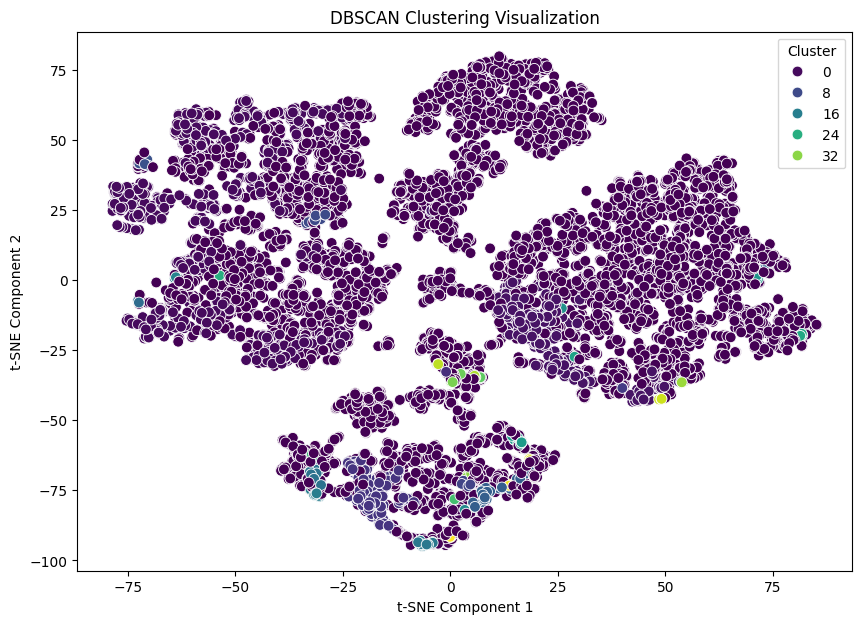

In [20]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `scaled_data` is already prepared
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Visualization using t-SNE (or PCA if you prefer)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dbscan_labels, palette='viridis', s=60)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

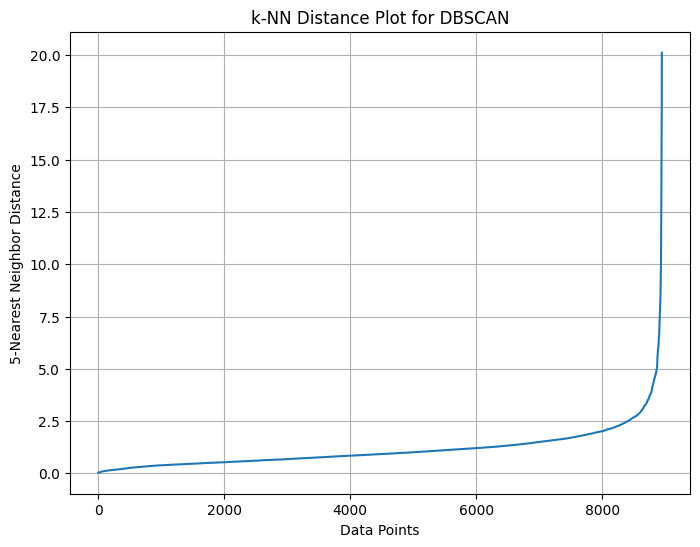

In [21]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set min_samples (e.g., 5)
min_samples = 5

# Compute k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort and plot k-distance
distances = np.sort(distances[:, min_samples-1])
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-NN Distance Plot for DBSCAN')
plt.xlabel('Data Points')
plt.ylabel(f'{min_samples}-Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import silhouette_score
# Try different eps and min_samples combinations
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)
        if len(set(labels)) > 1: # Avoid evaluating a single cluster
            score = silhouette_score(scaled_data, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')

eps: 0.3, min_samples: 3, Silhouette Score: -0.4875912681588748
eps: 0.3, min_samples: 5, Silhouette Score: -0.4390810531155604
eps: 0.3, min_samples: 10, Silhouette Score: -0.42054590312126017
eps: 0.5, min_samples: 3, Silhouette Score: -0.4793595878653643
eps: 0.5, min_samples: 5, Silhouette Score: -0.41242720461130394
eps: 0.5, min_samples: 10, Silhouette Score: -0.2998260576564294
eps: 0.7, min_samples: 3, Silhouette Score: -0.42094608691040036
eps: 0.7, min_samples: 5, Silhouette Score: -0.37020899651025413
eps: 0.7, min_samples: 10, Silhouette Score: -0.25186821711063495


In [23]:
from sklearn.metrics import silhouette_score
import numpy as np
# Range of min_samples to test
min_samples_range = [3, 5, 7, 10, 15, 20, 25, 30]

# Fixed eps value
eps = 0.5

# Iterate over different min_samples values
best_score = -1
best_min_samples = None

print("Testing different min_samples with eps =", eps)
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    # Only evaluate if there are more than one cluster formed
    if len(set(labels)) > 1:
        score = silhouette_score(scaled_data, labels)
        print(f'min_samples: {min_samples}, Silhouette Score: {score}')
        # Track the best score and corresponding min_samples
        if score > best_score:
            best_score = score
            best_min_samples = min_samples

print("\nBest configuration:")
print(f'eps: {eps}, min_samples: {best_min_samples}, Silhouette Score: {best_score}')

Testing different min_samples with eps = 0.5
min_samples: 3, Silhouette Score: -0.4793595878653643
min_samples: 5, Silhouette Score: -0.41242720461130394
min_samples: 7, Silhouette Score: -0.3562816550241897
min_samples: 10, Silhouette Score: -0.2998260576564294
min_samples: 15, Silhouette Score: -0.20233529500861958
min_samples: 20, Silhouette Score: -0.2573747980862011
min_samples: 25, Silhouette Score: -0.2712032912520185
min_samples: 30, Silhouette Score: -0.3116269253410741

Best configuration:
eps: 0.5, min_samples: 15, Silhouette Score: -0.20233529500861958


In [24]:
from sklearn.metrics import silhouette_score
import numpy as np

# Range of eps values to test
eps_range = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Fixed min_samples value
min_samples = 10

# Iterate over different eps values
best_score = -1
best_eps = None

print("Testing different eps with min_samples =", min_samples)
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    # Only evaluate if there are more than one cluster formed
    if len(set(labels)) > 1:
        score = silhouette_score(scaled_data, labels)
        print(f'eps: {eps}, Silhouette Score: {score}')
        # Track the best score and corresponding eps
        if score > best_score:
            best_score = score
            best_eps = eps

print("\nBest configuration:")
print(f'eps: {best_eps}, min_samples: {min_samples}, Silhouette Score: {best_score}')

Testing different eps with min_samples = 10
eps: 0.3, Silhouette Score: -0.42054590312126017
eps: 0.4, Silhouette Score: -0.38275869650974703
eps: 0.5, Silhouette Score: -0.2998260576564294
eps: 0.6, Silhouette Score: -0.26681465708393853
eps: 0.7, Silhouette Score: -0.25186821711063495
eps: 0.8, Silhouette Score: -0.15100708631397958
eps: 0.9, Silhouette Score: -0.04628023869288881
eps: 1.0, Silhouette Score: 0.017191787761950517

Best configuration:
eps: 1.0, min_samples: 10, Silhouette Score: 0.017191787761950517


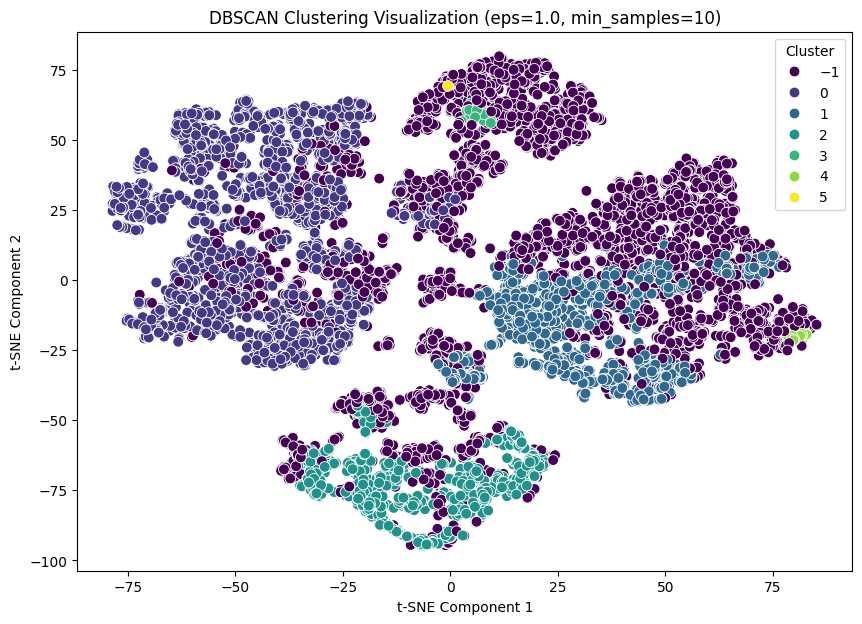

Number of clusters: 6
Number of noise points: 3876


In [25]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Apply DBSCAN with the chosen configuration
dbscan = DBSCAN(eps=1.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Visualization using t-SNE (assuming tsne_data is already available)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dbscan_labels, palette='viridis', s=60)
plt.title('DBSCAN Clustering Visualization (eps=1.0, min_samples=10)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# Print the number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

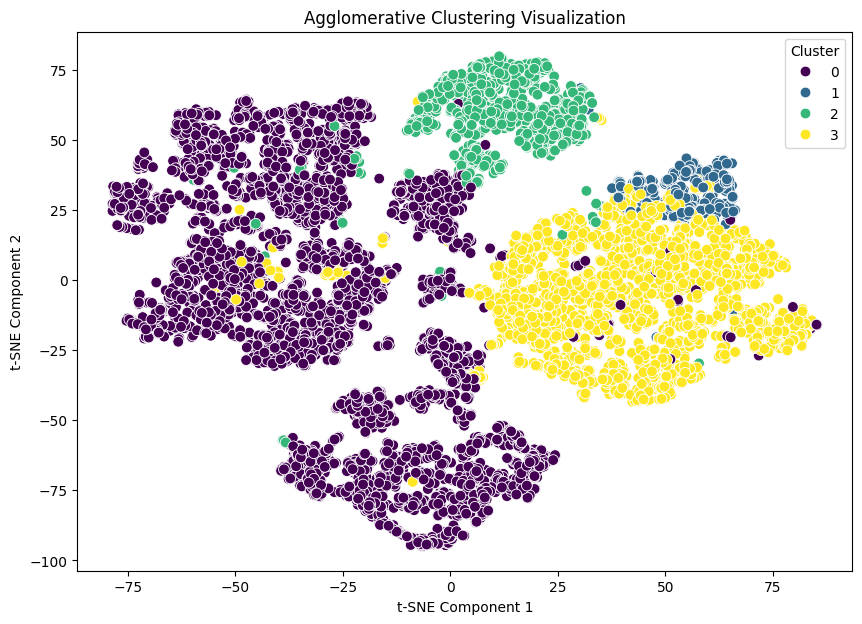

In [26]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)  # Adjust n_clusters as needed
agglo_labels = agglo.fit_predict(scaled_data)

# Add Agglomerative cluster labels to the dataframe
df['Agglomerative_Cluster'] = agglo_labels

# Visualization using t-SNE (or PCA if you prefer)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=agglo_labels, palette='viridis', s=60)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

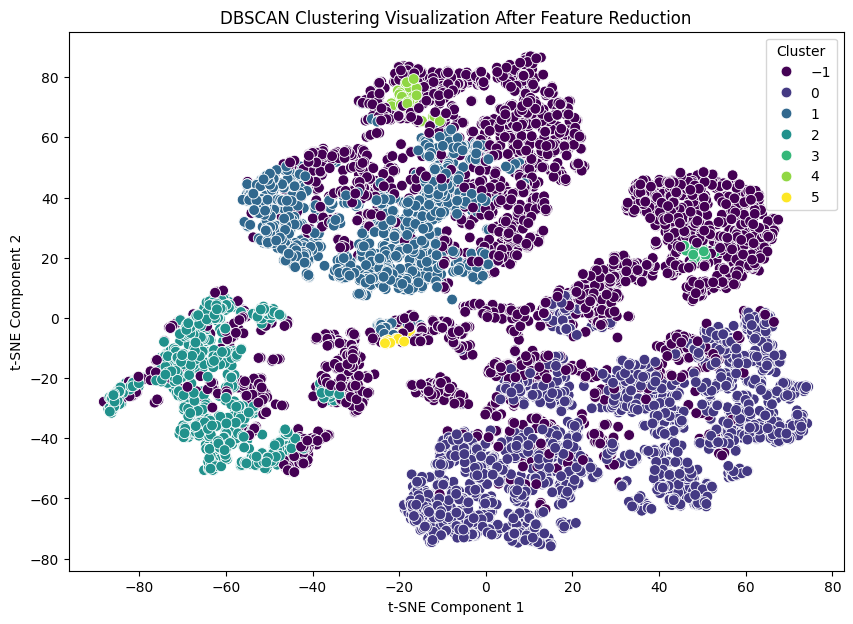

Number of clusters after feature reduction: 6
Number of noise points after feature reduction: 3773


In [28]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to remove (based on the previous correlation analysis)
features_to_remove = ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']

# Drop the identified highly correlated features
df_reduced = df_cleaned.drop(columns=features_to_remove)

# Standardize the remaining features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_reduced = scaler.fit_transform(df_reduced)

# Apply DBSCAN with the chosen configuration
dbscan = DBSCAN(eps=1, min_samples=15)
dbscan_labels = dbscan.fit_predict(scaled_data_reduced)

# Add DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster_Reduced'] = dbscan_labels

# Visualization using t-SNE (assuming t-SNE data is computed from the reduced data)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data_reduced = tsne.fit_transform(scaled_data_reduced)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data_reduced[:, 0], y=tsne_data_reduced[:, 1], hue=dbscan_labels, palette='viridis', s=60)
plt.title('DBSCAN Clustering Visualization After Feature Reduction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# Print the number of clusters and noise points
n_clusters_reduced = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_reduced = list(dbscan_labels).count(-1)
print(f'Number of clusters after feature reduction: {n_clusters_reduced}')
print(f'Number of noise points after feature reduction: {n_noise_reduced}')

In [29]:
from sklearn.metrics import silhouette_score
# Define ranges for eps and min_samples to test
eps_range = np.arange(0.3, 1.2, 0.1)
min_samples_range = [5, 10, 15, 20]

best_score = -1
best_eps = None
best_min_samples = None

# Grid search for optimal parameters
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data_reduced)
        
        # Only evaluate if more than one cluster is formed
        if len(set(labels)) > 1:
            score = silhouette_score(scaled_data_reduced, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')
            
            # Track the best score and corresponding parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print("\nBest Configuration:")
print(f'eps: {best_eps}, min_samples: {best_min_samples}, Silhouette Score: {best_score}')

eps: 0.3, min_samples: 5, Silhouette Score: -0.4332590130177533
eps: 0.3, min_samples: 10, Silhouette Score: -0.4151407262430731
eps: 0.3, min_samples: 15, Silhouette Score: -0.3482264439268975
eps: 0.3, min_samples: 20, Silhouette Score: -0.3480306907800007
eps: 0.4, min_samples: 5, Silhouette Score: -0.4311417462982549
eps: 0.4, min_samples: 10, Silhouette Score: -0.3727720626975209
eps: 0.4, min_samples: 15, Silhouette Score: -0.36820699487357644
eps: 0.4, min_samples: 20, Silhouette Score: -0.3542244772333161
eps: 0.5, min_samples: 5, Silhouette Score: -0.4107023456930126
eps: 0.5, min_samples: 10, Silhouette Score: -0.28347201529534577
eps: 0.5, min_samples: 15, Silhouette Score: -0.187589881271462
eps: 0.5, min_samples: 20, Silhouette Score: -0.22897411265645407
eps: 0.6000000000000001, min_samples: 5, Silhouette Score: -0.4141910943138281
eps: 0.6000000000000001, min_samples: 10, Silhouette Score: -0.26871553199604903
eps: 0.6000000000000001, min_samples: 15, Silhouette Score: -

In [30]:
# Separate noise points and clustered points
noise_points = df[df['DBSCAN_Cluster_Reduced'] == -1]
clustered_points = df[df['DBSCAN_Cluster_Reduced'] != -1]

# Get summary statistics
print("Summary Statistics for Noise Points:")
print(noise_points.describe())

print("\nSummary Statistics for Clustered Points:")
print(clustered_points.describe())

Summary Statistics for Noise Points:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   3773.000000        3773.000000   3773.000000       3773.000000   
mean    2420.444738           0.889789   1790.288781       1110.377803   
std     2684.776136           0.206922   3058.738664       2413.407833   
min        0.000000           0.000000      0.000000          0.000000   
25%      341.901741           0.875000    135.310000          0.000000   
50%     1455.736956           1.000000    854.200000        300.000000   
75%     3626.196814           1.000000   2352.000000       1300.480000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             3773.000000   3773.000000          3773.000000   
mean               680.306517   1818.662573             0.578643   
std               1289.747623   2916.791869             0.396540   
min                  0.0

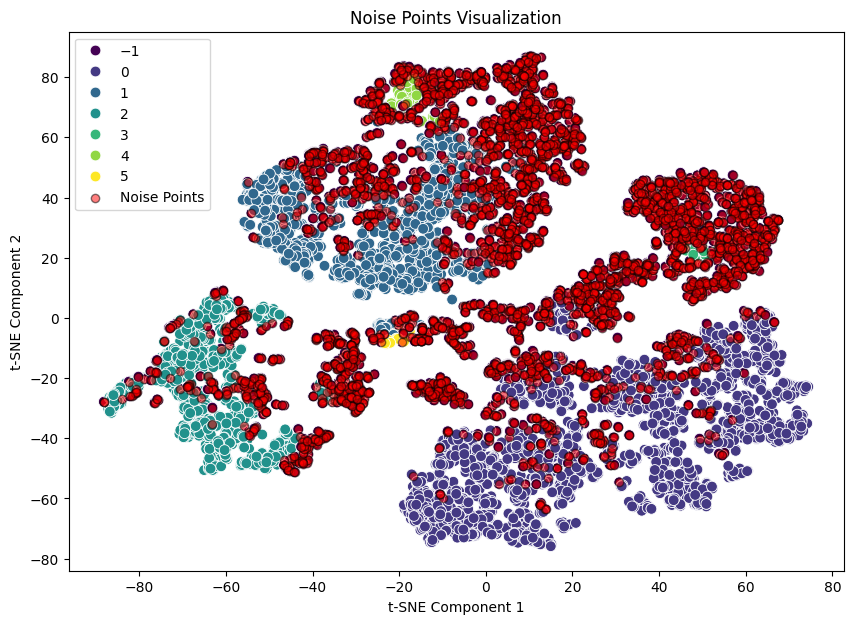

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of noise points vs. clustered points using t-SNE data
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data_reduced[:, 0], y=tsne_data_reduced[:, 1], hue=df['DBSCAN_Cluster_Reduced'], palette='viridis', s=60)
plt.scatter(tsne_data_reduced[noise_points.index, 0], tsne_data_reduced[noise_points.index, 1], 
            color='red', label='Noise Points', alpha=0.5, edgecolor='k')
plt.title('Noise Points Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

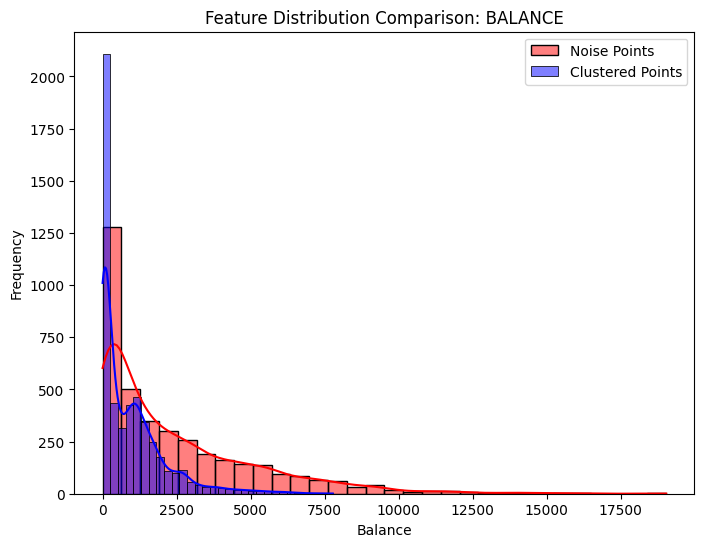

In [32]:
import matplotlib.pyplot as plt

# Compare distributions of a specific feature (e.g., 'BALANCE') between noise and clustered points
plt.figure(figsize=(8, 6))
sns.histplot(noise_points['BALANCE'], color='red', label='Noise Points', kde=True, bins=30, alpha=0.5)
sns.histplot(clustered_points['BALANCE'], color='blue', label='Clustered Points', kde=True, bins=30, alpha=0.5)
plt.title('Feature Distribution Comparison: BALANCE')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [33]:
# Profile of noise points
noise_profile = noise_points.describe().transpose()
print("Noise Points Profile:")
print(noise_profile)

# Profile of clustered points
clustered_profile = clustered_points.describe().transpose()
print("\nClustered Points Profile:")
print(clustered_profile)

Noise Points Profile:
                                   count         mean          std        min  \
BALANCE                           3773.0  2420.444738  2684.776136   0.000000   
BALANCE_FREQUENCY                 3773.0     0.889789     0.206922   0.000000   
PURCHASES                         3773.0  1790.288781  3058.738664   0.000000   
ONEOFF_PURCHASES                  3773.0  1110.377803  2413.407833   0.000000   
INSTALLMENTS_PURCHASES            3773.0   680.306517  1289.747623   0.000000   
CASH_ADVANCE                      3773.0  1818.662573  2916.791869   0.000000   
PURCHASES_FREQUENCY               3773.0     0.578643     0.396540   0.000000   
ONEOFF_PURCHASES_FREQUENCY        3773.0     0.309866     0.342769   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  3773.0     0.421488     0.407449   0.000000   
CASH_ADVANCE_FREQUENCY            3773.0     0.211342     0.250128   0.000000   
CASH_ADVANCE_TRX                  3773.0     5.667904     9.499663   0.000000   
PURCHA

In [34]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for clustered points (excluding noise)
valid_points = scaled_data_reduced[df['DBSCAN_Cluster_Reduced'] != -1]
valid_labels = df['DBSCAN_Cluster_Reduced'][df['DBSCAN_Cluster_Reduced'] != -1]

silhouette = silhouette_score(valid_points, valid_labels)
print(f'Silhouette Score for Clustered Points (excluding noise): {silhouette}')

Silhouette Score for Clustered Points (excluding noise): 0.31550821307225074


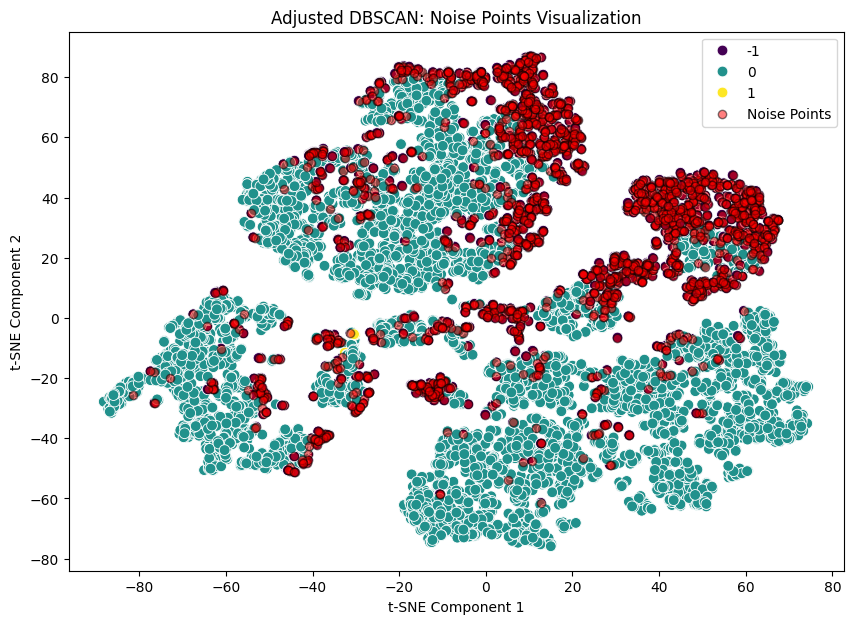

Number of clusters after feature reduction: 2
Number of noise points after feature reduction: 2043


In [35]:
# Experiment with slightly higher eps and/or lower min_samples
dbscan = DBSCAN(eps=1.3, min_samples=10)  # Adjust as needed
dbscan_labels = dbscan.fit_predict(scaled_data_reduced)

# Visualize again to see if noise points have reduced
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data_reduced[:, 0], y=tsne_data_reduced[:, 1], hue=dbscan_labels, palette='viridis', s=60)
plt.scatter(tsne_data_reduced[dbscan_labels == -1, 0], tsne_data_reduced[dbscan_labels == -1, 1], 
            color='red', label='Noise Points', alpha=0.5, edgecolor='k')
plt.title('Adjusted DBSCAN: Noise Points Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Print the number of clusters and noise points
n_clusters_reduced = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_reduced = list(dbscan_labels).count(-1)
print(f'Number of clusters after feature reduction: {n_clusters_reduced}')
print(f'Number of noise points after feature reduction: {n_noise_reduced}')

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define models
models = {
    'KMeans': KMeans(n_clusters=4),
    'DBSCAN': DBSCAN(eps=1.0, min_samples=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'HDBSCAN': HDBSCAN(min_samples=10)
}

# Evaluate each model
for name, model in models.items():
    labels = model.fit_predict(scaled_data_reduced)
    if len(set(labels)) > 1:
        silhouette = silhouette_score(scaled_data_reduced, labels)
        davies_bouldin = davies_bouldin_score(scaled_data_reduced, labels)
        calinski_harabasz = calinski_harabasz_score(scaled_data_reduced, labels)
        print(f"{name} - Silhouette Score: {silhouette}, Davies-Bouldin: {davies_bouldin}, Calinski-Harabasz: {calinski_harabasz}")

KMeans - Silhouette Score: 0.20035346390137998, Davies-Bouldin: 1.5450242768523326, Calinski-Harabasz: 1810.4623860418455
DBSCAN - Silhouette Score: 0.02110821280688239, Davies-Bouldin: 1.7808435569224574, Calinski-Harabasz: 423.44703396694337
Agglomerative - Silhouette Score: 0.15481053282910223, Davies-Bouldin: 1.6961245662190714, Calinski-Harabasz: 1449.4728218934106
HDBSCAN - Silhouette Score: -0.3170024487681439, Davies-Bouldin: 1.4403318246287602, Calinski-Harabasz: 70.86732620239542


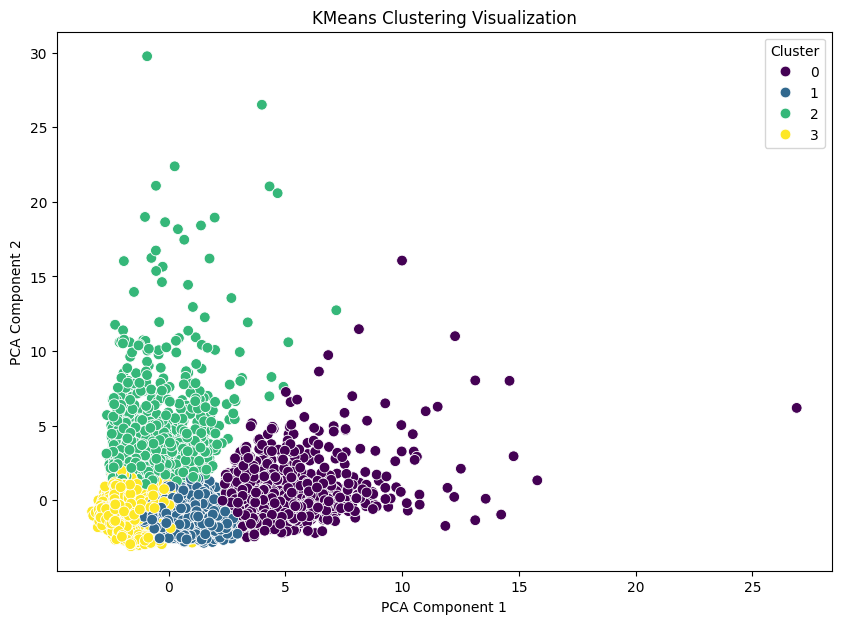

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Fit KMeans with the current best configuration
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data_reduced)

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data_reduced)

# Plot the KMeans clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.title('KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

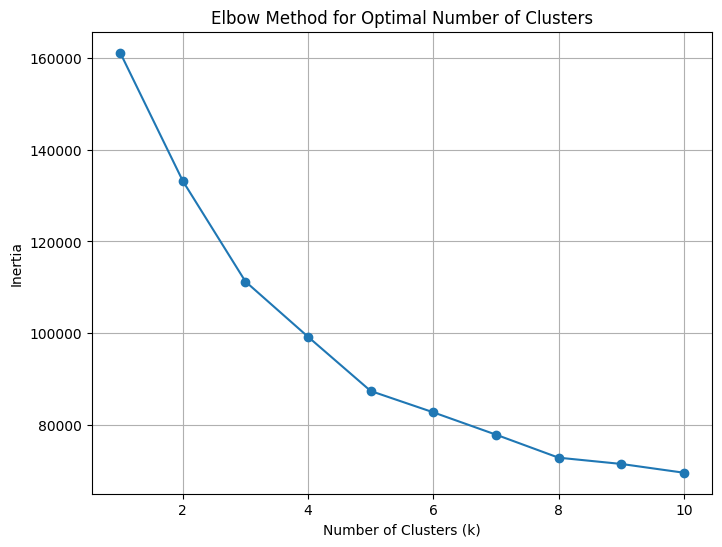

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values to test
k_values = range(1, 11)
inertias = []

# Fit KMeans for each k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data_reduced)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

 Optimize KMeans Model

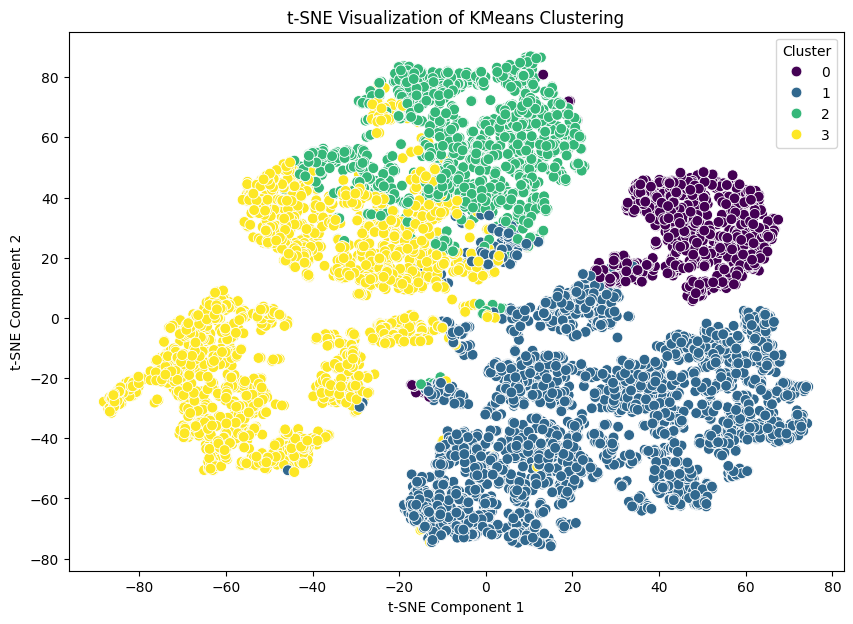

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(scaled_data_reduced)

# Plot the t-SNE clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.title('t-SNE Visualization of KMeans Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

In [43]:
# Create new features
df_cleaned['PURCHASES_RATIO'] = df_cleaned['ONEOFF_PURCHASES'] / (df_cleaned['INSTALLMENTS_PURCHASES'] + 1)
df_cleaned['BALANCE_RATIO'] = df_cleaned['BALANCE'] / (df_cleaned['CREDIT_LIMIT'] + 1)

# Scale again and run KMeans
scaled_features = scaler.fit_transform(df_cleaned)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [44]:
from scipy.stats import zscore

# Remove outliers based on Z-score
df_cleaned = df_cleaned[(np.abs(zscore(df_cleaned)) < 3).all(axis=1)]

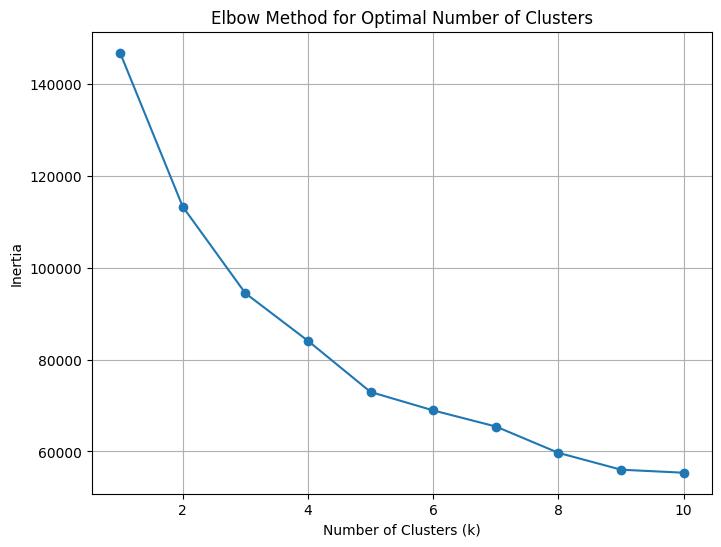

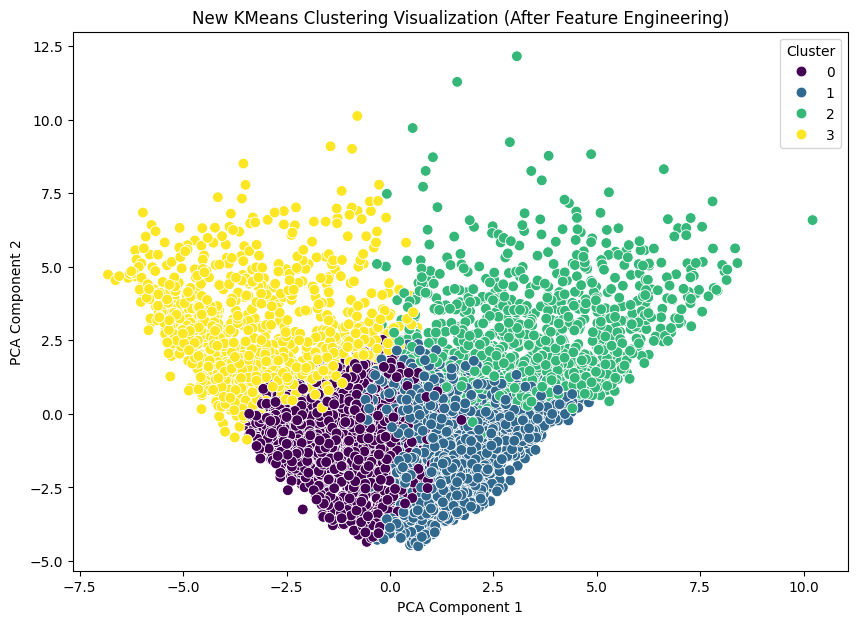

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Feature Engineering (create new features and/or remove outliers if needed)
# Example of creating new features
df_cleaned['PURCHASES_RATIO'] = df_cleaned['ONEOFF_PURCHASES'] / (df_cleaned['INSTALLMENTS_PURCHASES'] + 1)
df_cleaned['BALANCE_RATIO'] = df_cleaned['BALANCE'] / (df_cleaned['CREDIT_LIMIT'] + 1)

# Step 2: Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

# Step 3: Dimensionality Reduction using PCA
pca = PCA(n_components=10)  # Reduce to 10 components to retain most of the variance
pca_data = pca.fit_transform(scaled_features)

# Optional: Use t-SNE for better visualization if needed
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# tsne_data = tsne.fit_transform(pca_data)

# Step 4: Determine Optimal Number of Clusters using Elbow Method
k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Step 5: Apply KMeans with chosen number of clusters
optimal_k = 4  # Adjust based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Step 6: Visualize the New KMeans Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.title('New KMeans Clustering Visualization (After Feature Engineering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Add the Cluster Labels back to the DataFrame
df_cleaned['Cluster'] = kmeans_labels
print(df_cleaned.head())

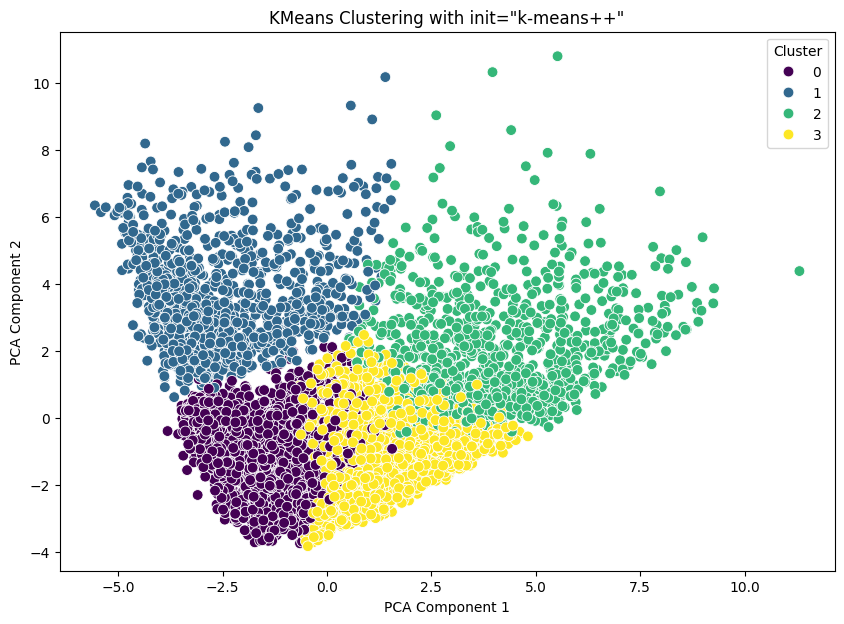

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature Engineering (create new features if needed)
df_cleaned['PURCHASES_RATIO'] = df_cleaned['ONEOFF_PURCHASES'] / (df_cleaned['INSTALLMENTS_PURCHASES'] + 1)
df_cleaned['BALANCE_RATIO'] = df_cleaned['BALANCE'] / (df_cleaned['CREDIT_LIMIT'] + 1)

# Step 2: Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

# Step 3: Dimensionality Reduction using PCA
pca = PCA(n_components=10)  # Reduce to 10 components
pca_data = pca.fit_transform(scaled_features)

# Step 4: Apply KMeans with init='k-means++' to spread out initial centroids
optimal_k = 4  # Adjust based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, max_iter=300, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_data)

# Step 5: Visualize the New KMeans Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.title('KMeans Clustering with init="k-means++"')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Add the Cluster Labels back to the DataFrame
df_cleaned['Cluster'] = kmeans_labels
print(df_cleaned.head())

## PART 4 - INTERPRETING CLUSTERS

- Characterize the clusters formed: What kind of customers fall into each cluster? 
    What features are most significant in distinguishing between clusters?

In [55]:
# Assuming `kmeans_labels` contains the cluster labels and `df_cleaned` is the original data
df_cleaned['Cluster'] = kmeans_labels

# View the first few rows to verify
print(df_cleaned.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [56]:
# Group by cluster and calculate summary statistics
cluster_summary = df_cleaned.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Count the number of customers in each cluster
cluster_counts = df_cleaned['Cluster'].value_counts()
print("\nNumber of Customers in Each Cluster:")
print(cluster_counts)

Cluster Summary:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1009.406440           0.841006   262.816357        215.885281   
1        3263.668057           0.967375   310.285831        187.579371   
2        1541.004638           0.977845  2527.775311       1628.836490   
3         404.269123           0.870327   689.011654        157.993443   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     47.198069    439.819036             0.182417   
1                    122.736365   2693.173405             0.241722   
2                    898.984318    311.998341             0.923205   
3                    531.525548     80.508843             0.812547   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                     

In [58]:
# Get customers in Cluster 0
cluster_0_customers = df_cleaned[df_cleaned['Cluster'] == 0]
print("Customers in Cluster 0:")
print(cluster_0_customers.head())


Customers in Cluster 0:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   
8                   200.0      0.000000             0.333333   
9                     0.0      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
3                    0.083333                          0.000

In [61]:
# Summary statistics for each feature grouped by cluster
cluster_summary = df_cleaned.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1009.406440           0.841006   262.816357        215.885281   
1        3263.668057           0.967375   310.285831        187.579371   
2        1541.004638           0.977845  2527.775311       1628.836490   
3         404.269123           0.870327   689.011654        157.993443   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     47.198069    439.819036             0.182417   
1                    122.736365   2693.173405             0.241722   
2                    898.984318    311.998341             0.923205   
3                    531.525548     80.508843             0.812547   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                     

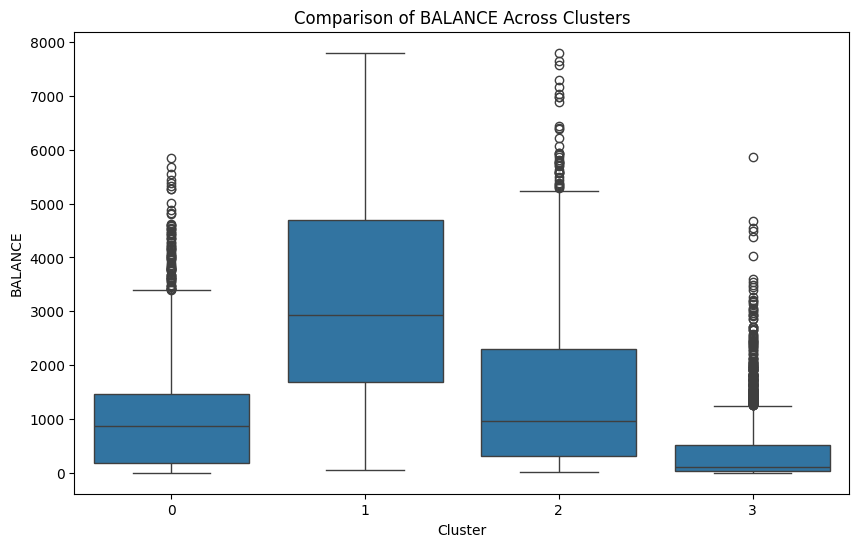

In [59]:
# Boxplot to compare BALANCE across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='BALANCE', data=df_cleaned)
plt.title("Comparison of BALANCE Across Clusters")
plt.show()

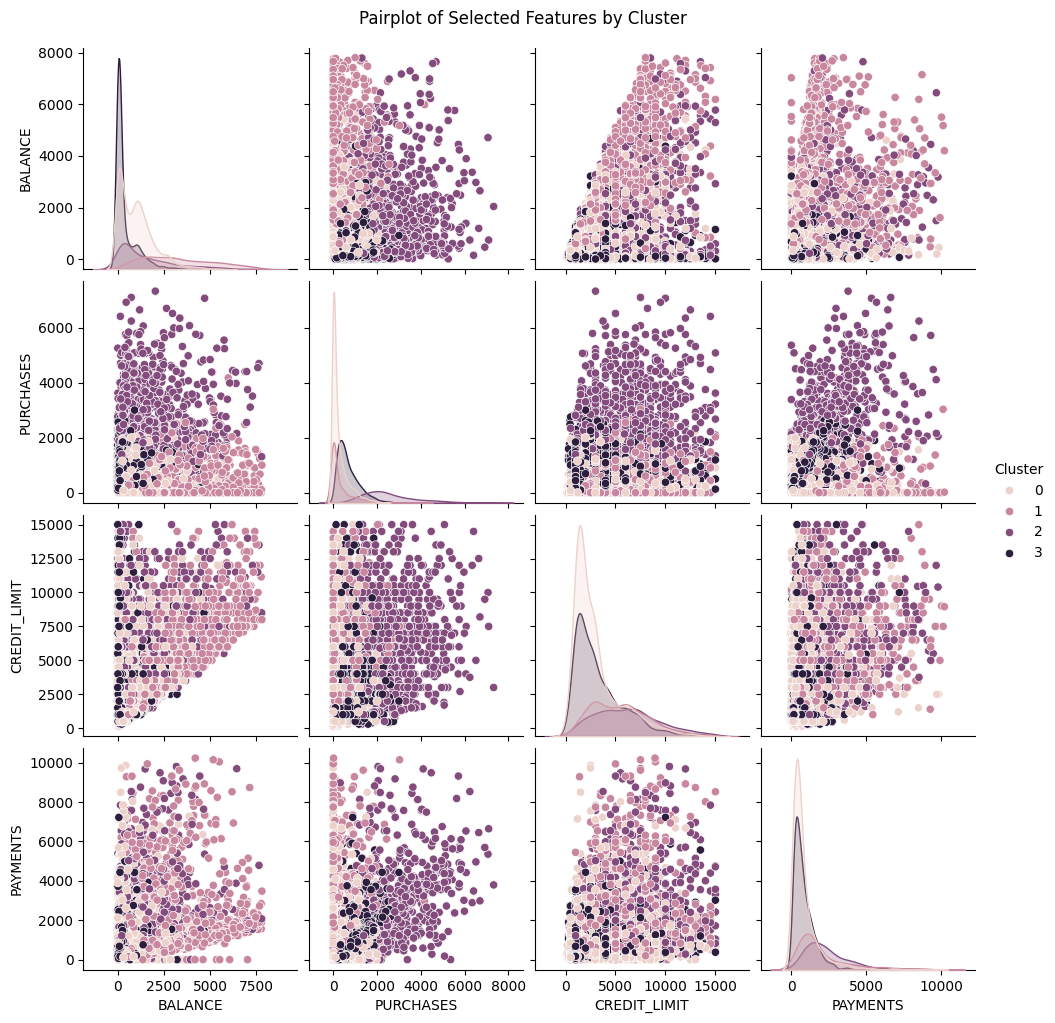

In [60]:
# Pairplot of selected features to understand cluster characteristics
sns.pairplot(df_cleaned, hue='Cluster', vars=['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS'])
plt.suptitle("Pairplot of Selected Features by Cluster", y=1.02)
plt.show()

## PART 5 - ACTIONABLE INSIGHTS

- Provide business recommendations based on the clusters formed. How would you target different customer segments?